In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
DATA_PATH = 'data/'

In [10]:
df_users = pd.read_csv(DATA_PATH+'users.csv')
df_tweets = pd.read_csv(DATA_PATH+'tweets.csv')

## Users file analysis

In [11]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11508 non-null  int64  
 1   name            11507 non-null  object 
 2   lang            11508 non-null  object 
 3   bot             11508 non-null  int64  
 4   created_at      11508 non-null  object 
 5   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 539.6+ KB


# Statuses count
Since we have a lot of nulls in the `statuses_count` column, we need to estimate the missing values. The estimate could be computed as the average difference between `statuses_count` and the tweets that we have in the tweets dataset for that user plus the count of the tweets that we have.

In [12]:
user_ids_with_null_statuses_count = df_users[df_users['statuses_count'].isnull() == True].id.astype(str).tolist()
user_ids_with_null_statuses_count

['616225564',
 '1370348599',
 '617369459',
 '2362195375',
 '2351047069',
 '1374225350',
 '616231067',
 '2377056618',
 '2368349419',
 '2352067280',
 '2213012017',
 '1174851499',
 '2353004929',
 '395436399',
 '2360059244',
 '64110707',
 '1174643767',
 '2353315740',
 '2351804233',
 '2385738188',
 '2370931374',
 '1127305652',
 '2354525906',
 '1174850017',
 '616300029',
 '2377046539',
 '222293510',
 '2381626472',
 '2378062974',
 '2362497235',
 '1176382580',
 '2359618297',
 '1174682425',
 '164508239',
 '2349695514',
 '2355212616',
 '617758666',
 '2360304794',
 '1174790898',
 '2366681186',
 '1205078954',
 '2358383732',
 '1130207582',
 '2363173189',
 '759191942',
 '2359444374',
 '162039067',
 '1174600752',
 '2386654226',
 '60346119',
 '2352835644',
 '2356322551',
 '2358710996',
 '2384487582',
 '39328305',
 '55398486',
 '548300100',
 '2357578801',
 '2357266153',
 '2356788036',
 '108581391',
 '2382953520',
 '2384101910',
 '38520305',
 '104657589',
 '2354194003',
 '2364429956',
 '2360391619',
 '6

How many records in the tweets file have user_ids that match the users that have a null status count?

In [13]:
df_tweets['user_id'].isin(user_ids_with_null_statuses_count).value_counts()

False    13613038
True        51658
Name: user_id, dtype: int64

Select tweets in tweets file which have a user_id which has a null statuses_count in the users file

In [14]:
tweets_by_user_ids_with_null_statuses_count = df_tweets[df_tweets['user_id'].isin(user_ids_with_null_statuses_count)]

Count how many different tweets (created_at disambiguates this) we have for each user_id

In [15]:
# it'a series!
tweets_counts_null_statuses = tweets_by_user_ids_with_null_statuses_count.groupby(['user_id']).count()['created_at']
tweets_counts_null_statuses

user_id
101892747      2
104657589      1
105510200      4
105696650     23
106595346    209
            ... 
716723184     32
72348749     188
759191942      7
80479674      41
951793016     79
Name: created_at, Length: 399, dtype: int64

For users with a non-null statues_count, find the mean and median of this attribute.
As it is possible to see, the mean is probably affected by the presence of a lot of outliers.

In [16]:
nonnull_users = df_users[df_users['statuses_count'].isnull() == False]
mean_statuses_count = nonnull_users.statuses_count.mean()
median_statuses_count = nonnull_users.statuses_count.median()
print(mean_statuses_count,median_statuses_count)

5883.312359348276 68.0


Plot of statuses_count of users where this value is not null

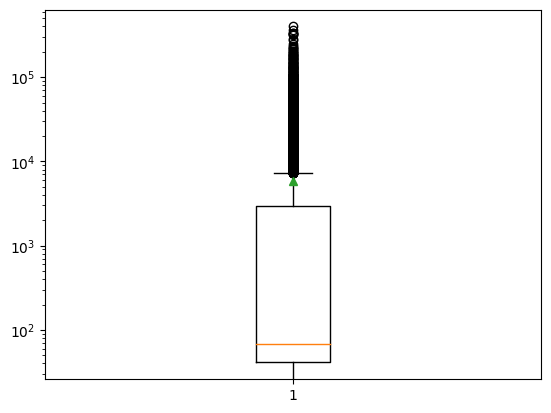

In [17]:
plt.boxplot(nonnull_users.statuses_count,showmeans=True)
plt.yscale('log')
plt.show()

The boxplot shows that the mean is near the 90th percentile, so we find more reasonable to use the median value to replace the missing values for the `statuses_count` attribute.

--------- NO ---------

In [19]:
user_ids_with_nonnull_statuses_count = df_users[df_users['statuses_count'].isnull() == False].id.astype(str).tolist()
tweets_by_user_ids_with_nonnull_statuses_count = df_tweets[df_tweets['user_id'].isin(user_ids_with_nonnull_statuses_count)]
tweets_counts_nonnull_statuses = tweets_by_user_ids_with_nonnull_statuses_count.groupby(['user_id']).count()['created_at']

In [20]:
values = nonnull_users.statuses_count.values - tweets_counts_nonnull_statuses.values
print(np.mean(values), np.median(values))

4697.048609235755 -42.0


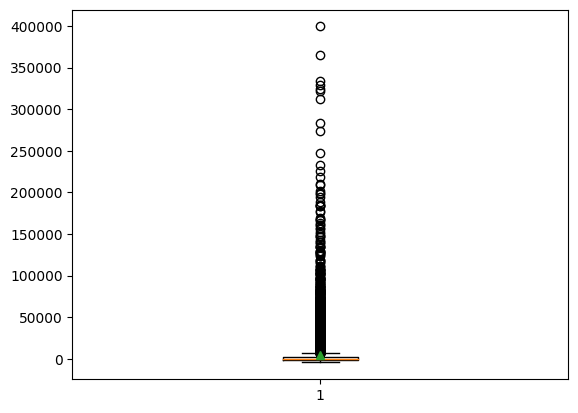

In [21]:
plt.boxplot(values,showmeans=True)
plt.show()

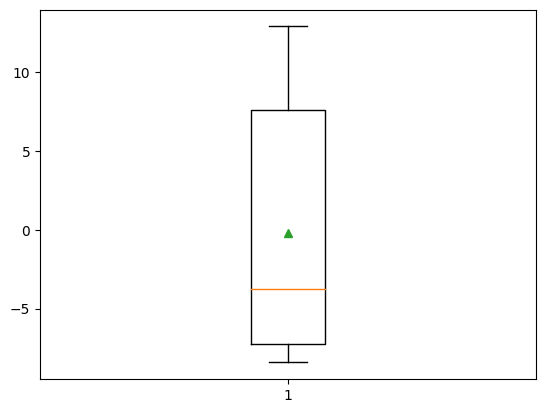

In [22]:
sign = np.sign(values)
log_values = np.log(np.where(np.abs(values)==0,1e-9, np.abs(values)))
plt.boxplot(sign*log_values,showmeans=True)
plt.show()

In [23]:
len(values) - np.count_nonzero(values)

20

--------- NO ---------

0   id              11712595 non-null  object
  - MISSING VALUES: ??

1   user_id         11495314 non-null  object
  - MISSING VALUES: ??

2   retweet_count   11275463 non-null  object
  - MISSING VALUES:

3   reply_count     11064719 non-null  object
  - MISSING VALUES:

4   favorite_count  11065055 non-null  object
  - MISSING VALUES:

5   num_hashtags    10655073 non-null  object
  - MISSING VALUES:

6   num_urls        11063974 non-null  object
  - MISSING VALUES:

7   num_mentions    10858432 non-null  object
  - MISSING VALUES:

8   created_at      11712597 non-null  object
  - MISSING VALUES: no null values

9   text            11182415 non-null  object
  - MISSING VALUES:

Replace null statues_count values with median of statues_count of the other users

In [24]:
df_users.statuses_count.fillna(median_statuses_count, inplace=True)

In [25]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11508 non-null  int64  
 1   name            11507 non-null  object 
 2   lang            11508 non-null  object 
 3   bot             11508 non-null  int64  
 4   created_at      11508 non-null  object 
 5   statuses_count  11508 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 539.6+ KB


In [26]:
df_users['created_at_conv'] = pd.to_datetime(df_users['created_at']).astype(np.int64)
df_users

,id,name,lang,bot,created_at,statuses_count,created_at_conv
0,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76.0,1550858442000000000
1,2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54.0,1551150152000000000
2,137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,3.0,1430377796000000000
3,466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50.0,1484707758000000000
4,2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085.0,1560886221000000000
...,...,...,...,...,...,...,...
11503,2911861962,Madrid Lae Maika .,en,0,2019-11-29 13:16:02,1126.0,1575033362000000000
11504,1378532629,Clau Sato,en,0,2018-04-27 03:01:58,3024.0,1524798118000000000
11505,126984069,ALMA LETICIA NUÑO,es,0,2015-03-29 17:01:24,6.0,1427648484000000000
11506,2383025796,Minnie Guadagno,en,1,2019-03-13 02:44:13,42.0,1552445053000000000


<AxesSubplot:>

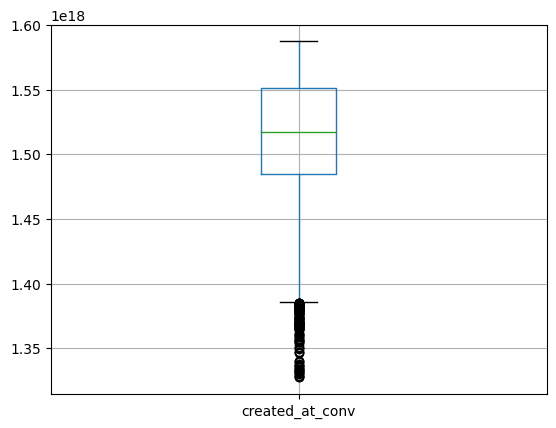

In [27]:
df_users.boxplot(['created_at_conv'])

In [28]:
df_users[np.logical_and(df_users['created_at_conv'] > 1.50e18, df_users['created_at_conv'] < 1.56e18)] # Min: 2017-07-14 05:34:46 Max: 2019-06-08 10:26:46

,id,name,lang,bot,created_at,statuses_count,created_at_conv
0,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76.0,1550858442000000000
1,2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54.0,1551150152000000000
5,2199062688,Qq,en,0,2018-11-19 06:58:18,7406.0,1542610698000000000
6,1174869769,Tania Wren,en,1,2018-02-15 10:51:28,21.0,1518691888000000000
9,2357425536,Meda Tatlock,en,1,2019-02-25 04:30:56,69.0,1551069056000000000
...,...,...,...,...,...,...,...
11501,2364683192,Larhonda Antu,en,1,2019-03-01 21:47:03,63.0,1551476823000000000
11502,1901595415,Prity Baleja,en,0,2018-09-26 19:48:46,359.0,1537991326000000000
11504,1378532629,Clau Sato,en,0,2018-04-27 03:01:58,3024.0,1524798118000000000
11506,2383025796,Minnie Guadagno,en,1,2019-03-13 02:44:13,42.0,1552445053000000000


Users below the 0.001 Quantile (outliers), still have possible created_at values (2012 is plausible, unlike 1960).
If any analyses should be performed on the created_at column we must take into account that there are many outliers.

In [29]:
df_users[df_users['created_at_conv'] < df_users['created_at_conv'].quantile(0.001)]

,id,name,lang,bot,created_at,statuses_count,created_at_conv
875,755116,呉⚛,en,0,2012-02-08 05:25:49,39158.0,1328678749000000000
1501,3873101,تاتسو موناكاتا,en,0,2012-04-10 07:28:52,106335.0,1334042932000000000
1610,887281,Paul Youlten,en,0,2012-03-11 22:25:08,626.0,1331504708000000000
1966,785080,W H,en,0,2012-02-23 01:08:16,22496.0,1329959296000000000
3285,1813221,Morgan Johnson,en,0,2012-03-22 23:43:40,20225.0,1332459820000000000
3878,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825.0,1327370258000000000
6261,1382561,jojoko,en,0,2012-03-18 23:24:35,8236.0,1332113075000000000
6983,2770511,べン,en,0,2012-03-30 02:31:13,38140.0,1333074673000000000
7192,806585,Christopher Mahan,en,0,2012-03-03 17:27:49,29997.0,1330795669000000000
10660,755746,Sarah Friedlander G.,en,0,2012-02-09 05:21:24,18035.0,1328764884000000000


In [30]:
df_users['bot'].value_counts()

1    6116
0    5392
Name: bot, dtype: int64

# Language field
There are some mispellings, so we are going to replace the mispelled ones to the correct ones, which are:
- en-gb to en-GB
- zh-tw to zh-TW

There are also two wrong values, 'Select Language...' and 'xx-lc', related to three users in total.
To understand the impact of the possible changes the number of tweets contained in the tweets file have been taken in account. The accounts seem to be active and have a lot of related tweets. The attribute is categorical so this value could be replaced by the mode which is the 'en' language.
Since there are only three users, to double-check the validity of our choice the relative tweets have been analyzed. The check confirmed that 'en' is the right choice.

In [31]:
df_users['lang'].value_counts()

en                    9970
it                     906
es                     319
pt                      65
en-gb                   50
ru                      42
fr                      36
ja                      33
zh-tw                   17
tr                      14
id                      12
ko                       9
de                       8
nl                       6
en-GB                    4
ar                       3
zh-TW                    3
da                       2
Select Language...       2
en-AU                    1
zh-cn                    1
pl                       1
el                       1
fil                      1
sv                       1
xx-lc                    1
Name: lang, dtype: int64

In [32]:
df_users['lang'].replace({'en-gb':'en-GB','zh-tw':'zh-TW'}, inplace=True)

In [33]:
df_users['lang'].value_counts()

en                    9970
it                     906
es                     319
pt                      65
en-GB                   54
ru                      42
fr                      36
ja                      33
zh-TW                   20
tr                      14
id                      12
ko                       9
de                       8
nl                       6
ar                       3
da                       2
Select Language...       2
en-AU                    1
zh-cn                    1
pl                       1
el                       1
fil                      1
sv                       1
xx-lc                    1
Name: lang, dtype: int64

In [34]:
df_users[np.logical_or(df_users['lang'] == 'Select Language...', df_users['lang'] == 'xx-lc')]

,id,name,lang,bot,created_at,statuses_count,created_at_conv
4166,2956613720,Leanne Arker,Select Language...,0,2020-01-05 00:09:59,57.0,1578182999000000000
8666,2904858613,Brooke,Select Language...,0,2019-11-22 05:44:46,85.0,1574401486000000000
10065,29552151,Chloe,xx-lc,0,2014-04-09 21:36:02,15398.0,1397079362000000000


Select all tweets that have the user_ids of people who have "Select Language..." and "xx-lc" as language

In [35]:
ids = df_users[np.logical_or(df_users['lang'] == 'Select Language...', df_users['lang'] == 'xx-lc')].id.values.astype(str)
pd.set_option('display.max_rows',200)
df_tweets[df_tweets['user_id'].isin(ids[2:])]

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
6119,491274532679081984,29552151,0,0,0,0,0,0,2019-07-23 17:32:30,"Spent the majority of my day drawing around, c..."
12218,488693001456463872,29552151,0,0,0,0,0,0,2019-07-16 14:34:25,We all love dem cuddles. http://t.co/fPrcnUfacS
15946,485410906692919297,29552151,0,0,0,0,0,0,2019-07-07 13:12:33,Dog sitting until 8 tonight. Again..
16947,1683542282301364,29552151,0,NaN,0.0,NaN,0.0,NaN,2019-07-16 20:58:50,NaN
17457,7055458923,29552151,NaN,0.0,NaN,0.0,0.0,0,2020-02-27 20:17:18,The chocolate is soooooooooooo amazing.
...,...,...,...,...,...,...,...,...,...,...
13633429,492646759857152000,29552151,0,0,0,0,0,0,2019-07-27 12:25:15,@Cock_Penis Around 4 hopefully...Got to go to ...
13634576,479715963076874241,29552151,0,0,0,0,0,0,2019-06-21 20:02:52,I'd love to have white hair for real though.
13637349,562936922881159168,29552151,0,0,0,0,0,0,2020-02-06 11:33:15,Is there a way to wake up without feeling like...
13640124,481513416465854464,29552151,0,0,0,0,0,0,2019-06-26 19:05:19,...and my nails are obviously being painted bl...


In [36]:
df_users['lang'].replace({'Select Language...':'en','xx-lc':'en'}, inplace=True)

In [37]:
df_users['lang'].value_counts()

en       9973
it        906
es        319
pt         65
en-GB      54
ru         42
fr         36
ja         33
zh-TW      20
tr         14
id         12
ko          9
de          8
nl          6
ar          3
da          2
en-AU       1
zh-cn       1
pl          1
el          1
fil         1
sv          1
Name: lang, dtype: int64

In [38]:
df_users.to_csv(path_or_buf=DATA_PATH+'users_clean.csv', sep='#', index=False)